In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
import pandas as pd

df1 = pd.read_excel(r'C:\Users\bhumi\Desktop\EV_SALES_IN INDIA-20250311T060852Z-001\EV_SALES_IN INDIA\Ev Sales.xlsx')
df1.head()



,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141


In [3]:

import pandas as pd

df2 = pd.read_csv(r"C:\Users\bhumi\Desktop\EV_SALES_IN INDIA-20250311T060852Z-001\lifestyle.csv")
df2.head()


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [23]:

import pandas as pd

df3 = pd.read_csv(r"C:\Users\bhumi\Desktop\EV_SALES_IN INDIA-20250311T060852Z-001\indian-ev-data.csv")
df3.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


In [27]:
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)
print('DF3 Shape: ', df3.shape)

DF1 Shape:  (74, 6)
DF2 Shape:  (20000, 28)
DF3 Shape:  (50, 11)


In [29]:
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())
print(' <<< DATASET 3 -----------------------------------------------------------')
print(df3.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    74 non-null     datetime64[ns]
 1   2 W     74 non-null     int64         
 2   3 W     74 non-null     int64         
 3   4 W     74 non-null     int64         
 4   BUS     74 non-null     int64         
 5   TOTAL   74 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.6 KB
None
 <<< DATASET 2 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              2

In [25]:
d1 = df1.describe()
display('<<< DATASET 1 >>>', d1)
d2 = df2.describe()
display('<<< DATASET 2 >>>', d2)
d3 = df3.describe()
display('<<< DATASET 3 >>>', d3)

'<<< DATASET 1 >>>'

,YEAR,2 W,3 W,4 W,BUS,TOTAL
count,74,74.000000,74.000000,74.000000,74.000000,74.000000
mean,2020-04-16 04:12:58.378378496,16938.729730,14851.351351,1272.567568,82.310811,33144.959459
min,2017-04-01 00:00:00,85.000000,668.000000,3.000000,0.000000,958.000000
25%,2018-10-08 18:00:00,1304.250000,7782.250000,187.750000,11.250000,9147.000000
50%,2020-04-16 00:00:00,3014.500000,10619.500000,317.500000,74.500000,14526.000000
75%,2021-10-24 06:00:00,23599.000000,18641.750000,1545.000000,113.500000,43902.750000
max,2023-05-01 00:00:00,105154.000000,45225.000000,8852.000000,331.000000,157788.000000
std,NaN,25846.636971,11002.517635,1841.195763,79.696672,38251.453387


'<<< DATASET 2 >>>'

,Income,Age,Dependents,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,...,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Segment
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,0.903200,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,...,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987,2.008500
std,4.001454e+04,13.578725,1.417616,0.698036,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,...,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951,1.360007
min,1.301187e+03,18.000000,0.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,...,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973,0.000000
25%,1.760488e+04,29.000000,1.000000,0.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,...,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307,0.000000
50%,3.018538e+04,41.000000,2.000000,1.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,...,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257,3.000000
75%,5.176545e+04,53.000000,3.000000,1.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,...,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981,3.000000
max,1.079728e+06,64.000000,4.000000,2.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,...,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137,3.000000


'<<< DATASET 3 >>>'

,id,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
count,50.00000,50.000000,50.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.50000,3.188000,120.160000,3.755102,120469.387755,6.795918,73.775510,2021.204082
std,14.57738,0.950325,30.370743,0.947158,46317.789078,6.570070,13.288882,0.499149
min,1.00000,2.200000,75.000000,2.500000,60000.000000,2.000000,50.000000,2020.000000
25%,13.25000,2.550000,100.000000,3.000000,85000.000000,3.000000,60.000000,2021.000000
50%,25.50000,2.900000,118.000000,3.500000,109000.000000,5.000000,80.000000,2021.000000
75%,37.75000,3.500000,140.000000,4.500000,149000.000000,6.000000,80.000000,2021.000000
max,50.00000,6.200000,200.000000,6.000000,250000.000000,25.000000,100.000000,2022.000000


first dataset


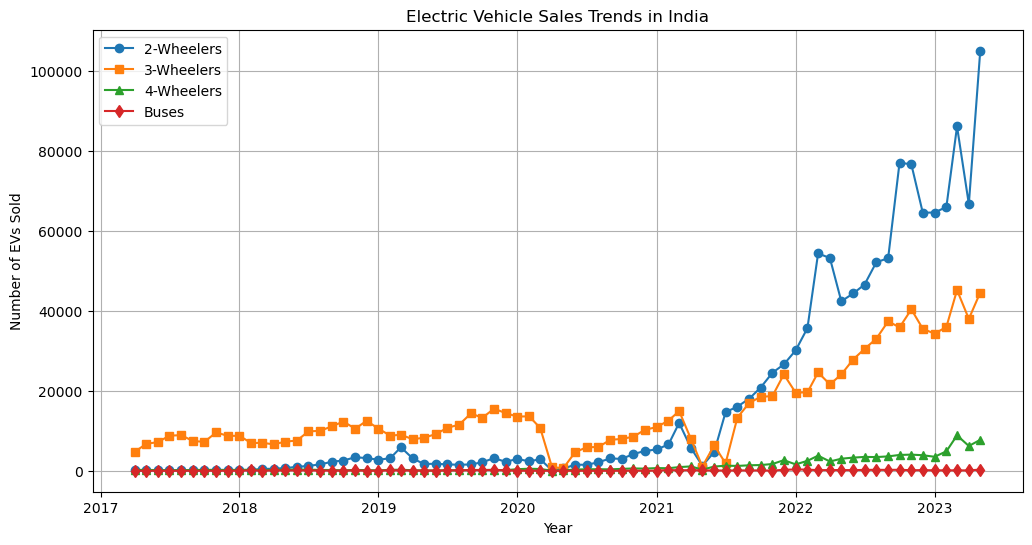

In [7]:
import matplotlib.pyplot as plt

# Plot sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(df1["YEAR"], df1["2 W"], label="2-Wheelers", marker="o")
plt.plot(df1["YEAR"], df1["3 W"], label="3-Wheelers", marker="s")
plt.plot(df1["YEAR"], df1["4 W"], label="4-Wheelers", marker="^")
plt.plot(df1["YEAR"], df1["BUS"], label="Buses", marker="d")

# Formatting
plt.xlabel("Year")
plt.ylabel("Number of EVs Sold")
plt.title("Electric Vehicle Sales Trends in India")
plt.legend()
plt.grid(True)
plt.show()


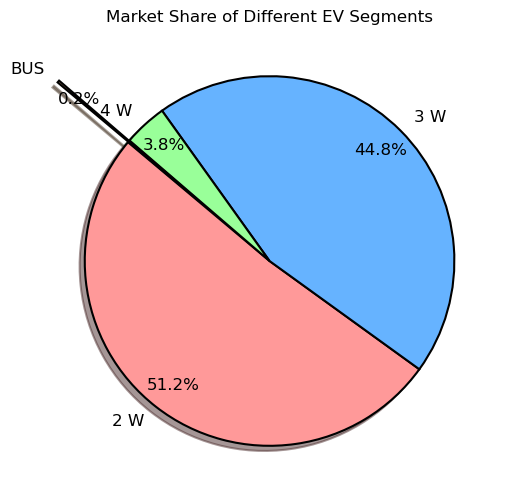

In [8]:
import matplotlib.pyplot as plt

# Sample Data
segment_totals = {'2 W': 51.1, '3 W': 44.8, '4 W': 3.8, 'BUS': 0.2}

# Define distinct colors for all four segments
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]

# Explode the smallest segment (BUS) for visibility
explode = (0, 0, 0, 0.5)  # Only moving BUS outward

# Create Pie Chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    segment_totals.values(), labels=segment_totals.keys(), autopct='%1.1f%%',
    startangle=140, colors=colors, pctdistance=0.85, shadow=True,
    explode=explode, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

# Increase font size for better visibility
for text in texts + autotexts:
    text.set_fontsize(12)

# Title and show chart
plt.title("Market Share of Different EV Segments")
plt.show()







In [9]:
# Calculate growth rate for each EV category
growth_rates = {}
for col in ["2 W", "3 W", "4 W", "BUS"]:
    growth_rates[col] = ((df1[col].iloc[-1] - df1[col].iloc[0]) / df1[col].iloc[0]) * 100

# Convert to DataFrame
growth_df = pd.DataFrame.from_dict(growth_rates, orient='index', columns=['Growth Rate (%)'])

# Display results
print("EV Market Growth Rates:")
print(growth_df)


EV Market Growth Rates:
     Growth Rate (%)
2 W     1.094354e+05
3 W     8.396588e+02
4 W     3.807071e+03
BUS              inf


C:\Users\bhumi\AppData\Local\Temp\ipykernel_28468\1807942457.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  growth_rates[col] = ((df1[col].iloc[-1] - df1[col].iloc[0]) / df1[col].iloc[0]) * 100


In [10]:
# Strategy recommendation based on growth trends
strategy = "\n**Market Entry Strategy:**\n"
if growth_df.loc['3 W', 'Growth Rate (%)'] > growth_df.loc['2 W', 'Growth Rate (%)']:
    strategy += "- Focus on **3-Wheelers (e-rickshaws)** as they dominate the market and have high demand in urban areas.\n"
if growth_df.loc['2 W', 'Growth Rate (%)'] > 50:
    strategy += "- **2-Wheelers (electric scooters/bikes)** are growing rapidly; target young professionals and delivery services.\n"
if growth_df.loc['4 W', 'Growth Rate (%)'] > 30:
    strategy += "- **4-Wheelers (EV cars)** show potential but require infrastructure and premium customer targeting.\n"

print(strategy)



**Market Entry Strategy:**
- **2-Wheelers (electric scooters/bikes)** are growing rapidly; target young professionals and delivery services.
- **4-Wheelers (EV cars)** show potential but require infrastructure and premium customer targeting.



second dataset


In [11]:


# Check for missing values
print("Missing values:\n", df2.isnull().sum())


Missing values:
 Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Mis

In [12]:
print(df2.columns)



Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')


In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Selecting relevant features for segmentation
features = [
    'Income', 'Age', 'Dependents', 'City_Tier', 'Rent', 'Loan_Repayment', 'Insurance',
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare',
    'Education', 'Miscellaneous', 'Disposable_Income', 'Desired_Savings_Percentage'
]

# Ensure all selected columns exist in df2
missing_cols = [col for col in features if col not in df2.columns]
if missing_cols:
    print(f"⚠️ Warning: The following columns are missing from the dataset: {missing_cols}")
else:
    # Convert categorical column 'City_Tier' to numerical values
    if df2['City_Tier'].dtype == 'object':
        label_encoder = LabelEncoder()
        df2['City_Tier'] = label_encoder.fit_transform(df2['City_Tier'])

    # Handle missing values (fill with mean values)
    df_cleaned = df2[features].fillna(df2[features].mean())

    # Standardizing the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_cleaned)

    # Display the first few rows of scaled data
    print("Scaled Data Sample:\n", df_scaled[:5])



Scaled Data Sample:
 [[ 7.62680213e-02  5.86855471e-01 -1.40799795e+00 -1.29394860e+00
   4.62036063e-01 -4.78737063e-01  5.03356427e-01  2.88552530e-01
  -2.53146761e-02  1.28200390e-01  5.86512096e-02  1.61247868e-01
  -7.13504468e-02 -8.06345245e-01  1.15022569e-03  5.26611880e-02
   1.04687900e+00]
 [-3.68047902e-01 -5.17841377e-01  2.85698123e-03  1.38678282e-01
  -4.04557661e-01 -4.78737063e-01 -3.92193521e-01 -4.74047790e-01
  -4.35606293e-01 -5.48370575e-01 -2.67707674e-01 -3.48340028e-01
  -3.22906002e-01 -3.05524548e-01 -3.15169885e-01 -8.26678114e-02
  -6.77246267e-01]
 [ 2.19478430e-01 -4.44194920e-01 -7.02570483e-01  1.57130517e+00
  -1.68614048e-01  5.98433644e-01  5.00214839e-01  2.19934961e-01
   1.93876830e-01  3.50678730e-02  1.84322752e-01  3.42254437e-01
   3.16581898e-01  2.13557407e-01 -2.39268934e-01  2.76319283e-01
   1.07425246e+00]
 [ 1.49624612e+00 -1.47524531e+00 -1.40799795e+00  1.57130517e+00
   6.59482116e-01  1.11162859e+00  2.30048012e+00  1.88340076e+0

In [14]:
from sklearn.cluster import KMeans

# Applying K-Means clustering with 4 customer segments
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df2['Segment'] = kmeans.fit_predict(df_scaled)

# Show clustered data
print(df2[['Income', 'Age', 'Segment']].head())


          Income  Age  Segment
0   44637.249636   49        0
1   26858.596592   34        3
2   50367.605084   35        0
3  101455.600247   21        1
4   24875.283548   52        3


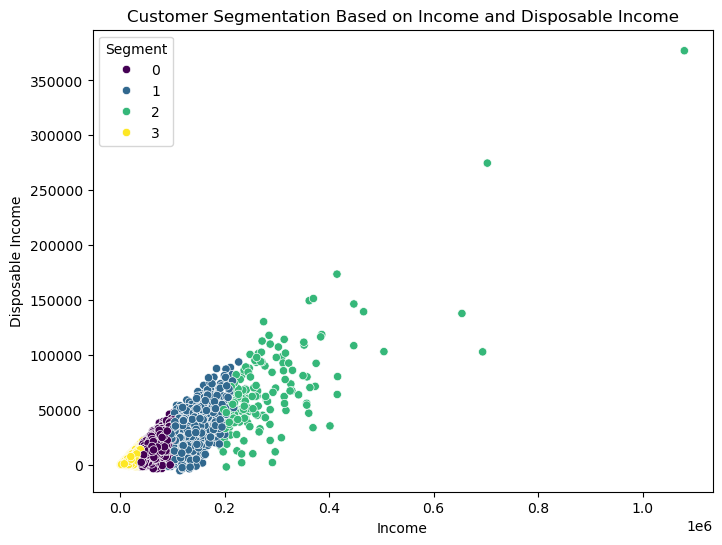

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Income vs Disposable Income, colored by segment
plt.figure(figsize=(8,6))
sns.scatterplot(x=df2['Income'], y=df2['Disposable_Income'], hue=df2['Segment'], palette='viridis')
plt.xlabel('Income')
plt.ylabel('Disposable Income')
plt.title('Customer Segmentation Based on Income and Disposable Income')
plt.legend(title='Segment')
plt.show()


In [16]:
# Analyzing the average values for each customer segment
segment_summary = df2.groupby('Segment').mean()
print(segment_summary)

# Interpretation for each segment
for i in range(4):
    print(f"Segment {i}:")
    if segment_summary.loc[i, 'Disposable_Income'] > 5000:  # Assuming threshold
        print(" High potential for EV adoption (Good disposable income)")
    elif segment_summary.loc[i, 'Loan_Repayment'] > 5000:
        print(" May hesitate due to existing financial commitments")
    else:
        print(" Less likely to adopt EVs due to financial constraints")
    print("-" * 40)


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
print(df2.columns)


In [ ]:
print(df2['Segment'].value_counts())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=df2['Segment'], palette="coolwarm")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.title("Distribution of Customer Segments")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df2["Segment"], y=df2["Income"], palette="coolwarm")
plt.xlabel("Customer Segment")
plt.ylabel("Income")
plt.title("Income Distribution by Customer Segment")
plt.xticks(rotation=45)
plt.show()


C:\Users\bhumi\AppData\Local\Temp\ipykernel_28468\3690657919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df2["Segment"], y=df2["Transport"], palette="coolwarm")


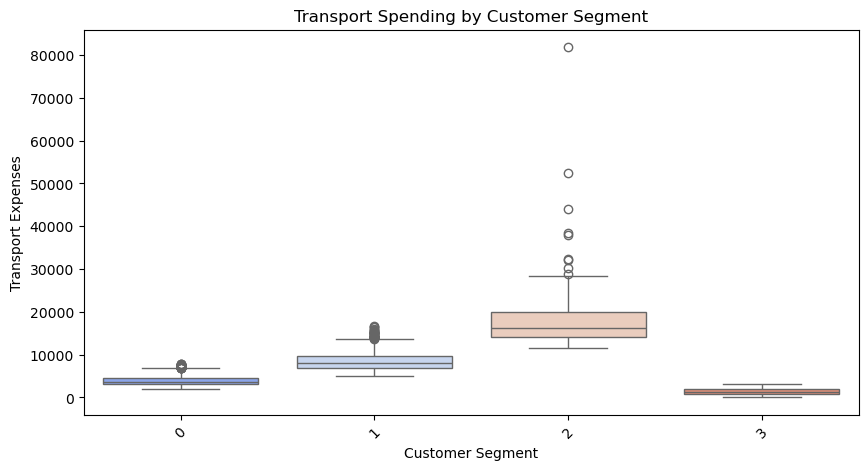

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df2["Segment"], y=df2["Transport"], palette="coolwarm")
plt.xlabel("Customer Segment")
plt.ylabel("Transport Expenses")
plt.title("Transport Spending by Customer Segment")
plt.xticks(rotation=45)
plt.show()


third dataset


In [38]:
# Selecting relevant numerical features for segmentation
features = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']
df_filtered = df3[features].dropna()  # Dropping missing values

In [42]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered)


C:\Users\bhumi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bhumi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bhumi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bhumi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

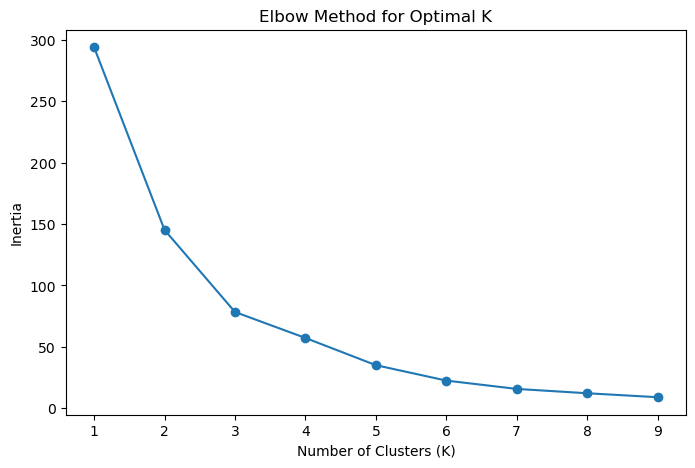

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [50]:
# Assuming 3 clusters based on the elbow curve
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_filtered['Cluster'] = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the original dataset
df3.loc[df_filtered.index, 'Cluster'] = df_filtered['Cluster']


C:\Users\bhumi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


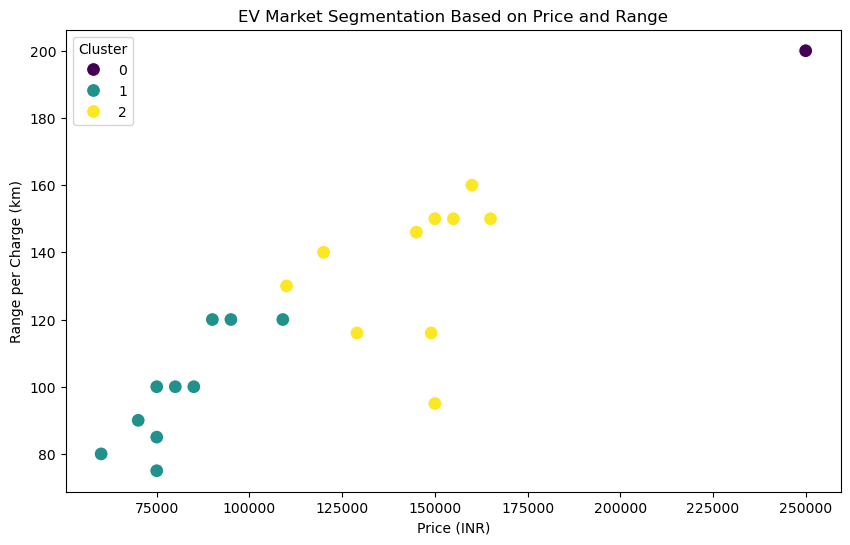

In [52]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['Price'], y=df_filtered['Range per Charge (km)'], hue=df_filtered['Cluster'], palette='viridis', s=100)
plt.xlabel('Price (INR)')
plt.ylabel('Range per Charge (km)')
plt.title('EV Market Segmentation Based on Price and Range')
plt.legend(title="Cluster")
plt.show()


In [54]:
# Analyzing cluster characteristics
cluster_summary = df_filtered.groupby('Cluster').mean()[features]
cluster_summary['Count'] = df_filtered['Cluster'].value_counts()

# Display the cluster characteristics
print(cluster_summary)


         Battery Capacity (kWh)  Range per Charge (km)  Charging Time  \
Cluster                                                                 
0                      6.200000             200.000000           5.00   
1                      2.630769             101.538462           3.00   
2                      3.445000             132.400000           4.55   

                 Price  Power (HP or kW)  Top Speed (km/h)  Count  
Cluster                                                            
0        250000.000000             25.00        100.000000      3  
1         86307.692308              3.50         65.192308     26  
2        145450.000000              8.35         81.000000     20  


C:\Users\bhumi\AppData\Local\Temp\ipykernel_28468\290379974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_filtered['Cluster'], palette='coolwarm')


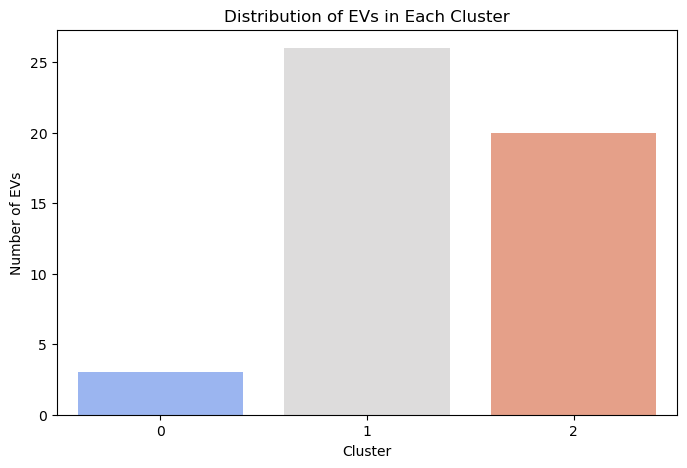

In [56]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_filtered['Cluster'], palette='coolwarm')
plt.xlabel("Cluster")
plt.ylabel("Number of EVs")
plt.title("Distribution of EVs in Each Cluster")
plt.show()


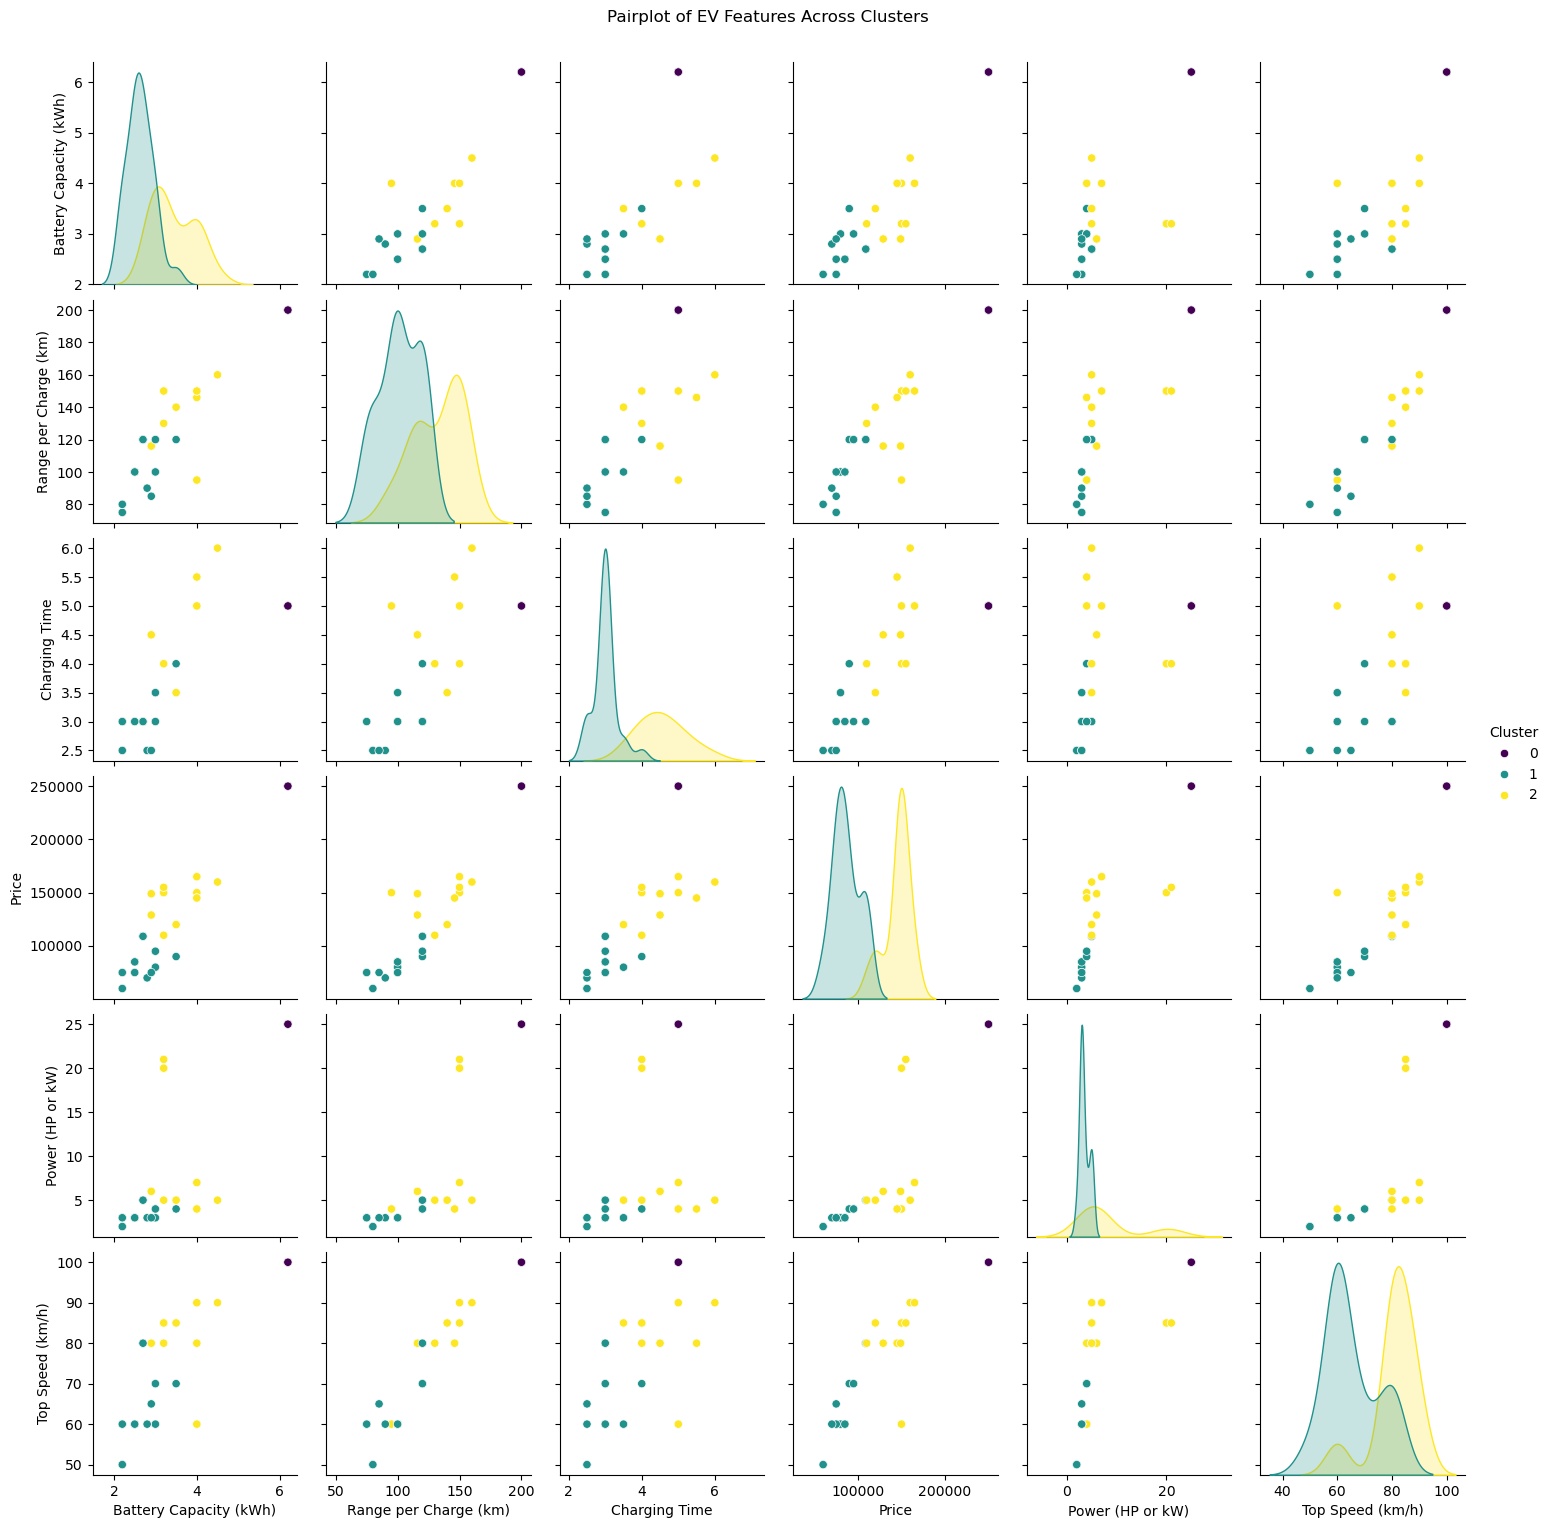

In [59]:
sns.pairplot(df_filtered, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle("Pairplot of EV Features Across Clusters", y=1.02)
plt.show()


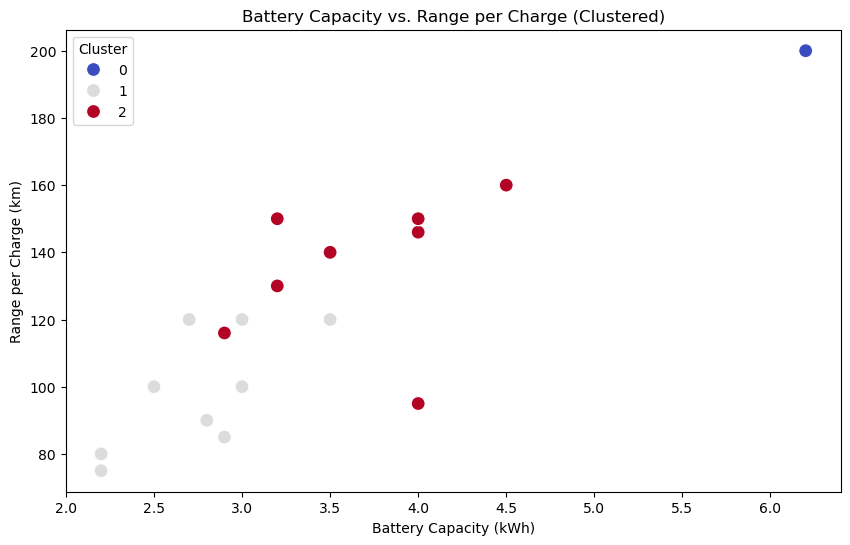

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['Battery Capacity (kWh)'], y=df_filtered['Range per Charge (km)'], hue=df_filtered['Cluster'], palette='coolwarm', s=100)
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range per Charge (km)")
plt.title("Battery Capacity vs. Range per Charge (Clustered)")
plt.legend(title="Cluster")
plt.show()


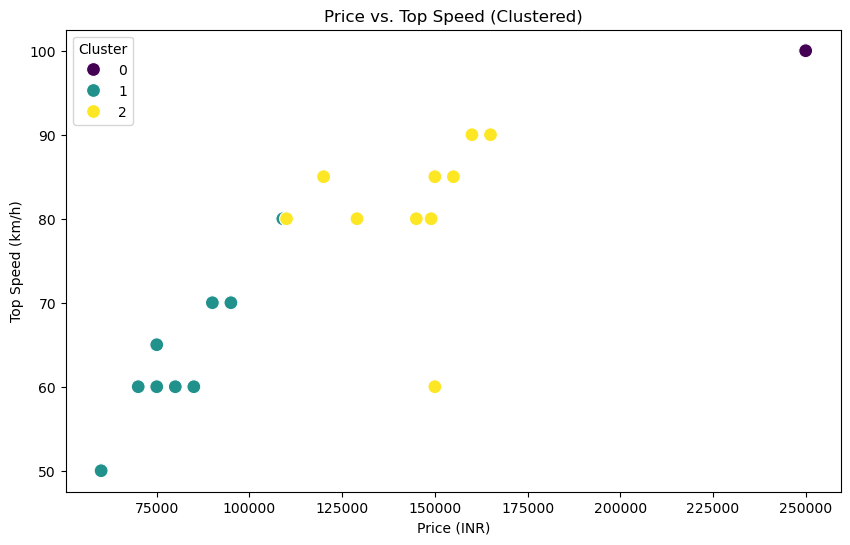

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['Price'], y=df_filtered['Top Speed (km/h)'], hue=df_filtered['Cluster'], palette='viridis', s=100)
plt.xlabel("Price (INR)")
plt.ylabel("Top Speed (km/h)")
plt.title("Price vs. Top Speed (Clustered)")
plt.legend(title="Cluster")
plt.show()
